# A/B Test

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns

In [135]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [136]:
a.mean()

np.float64(23.75)

In [137]:
b.mean()

np.float64(27.916666666666668)

In [138]:
d = b.mean() - a.mean()
d

np.float64(4.166666666666668)

#### code blew is example for learning numpy and continue to learning a/b testing

In [139]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [140]:
np.append(np.zeros(len(b)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [141]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(a))),
    np.append(a, b)
])
sales

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [23., 21., 19., 24., 35., 17., 18., 24., 33., 27., 21., 23., 31.,
        28., 19., 24., 32., 27., 16., 41., 23., 32., 29., 33.]])

In [142]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [143]:
np.random.shuffle(sales_t)
sales_t

array([[ 0., 33.],
       [ 1., 41.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 33.],
       [ 0., 21.],
       [ 1., 16.],
       [ 0., 27.],
       [ 0., 24.],
       [ 0., 19.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 23.],
       [ 0., 17.],
       [ 1., 27.],
       [ 1., 32.],
       [ 1., 29.],
       [ 0., 35.],
       [ 0., 21.],
       [ 0., 24.],
       [ 1., 19.],
       [ 0., 23.],
       [ 0., 18.],
       [ 1., 28.]])

In [144]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int32)

In [145]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
experiment_data

array([[ 0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [33., 41., 24., 32., 33., 21., 16., 27., 24., 19., 23., 31., 23.,
        17., 27., 32., 29., 35., 21., 24., 19., 23., 18., 28.]])

In [146]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 0., 33.],
       [ 1., 41.],
       [ 1., 24.],
       [ 0., 32.],
       [ 0., 33.],
       [ 0., 21.],
       [ 1., 16.],
       [ 0., 27.],
       [ 1., 24.],
       [ 0., 19.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 23.],
       [ 0., 17.],
       [ 1., 27.],
       [ 0., 32.],
       [ 0., 29.],
       [ 0., 35.],
       [ 0., 21.],
       [ 0., 24.],
       [ 0., 19.],
       [ 1., 23.],
       [ 1., 18.],
       [ 0., 28.]])

In [147]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([41., 24., 16., 24., 31., 23., 27., 23., 18.])

In [148]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

np.float64(25.22222222222222)

In [149]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1]

array([33., 32., 33., 21., 27., 19., 23., 17., 32., 29., 35., 21., 24.,
       19., 28.])

In [150]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

np.float64(26.2)

In [151]:
np.empty([10, 1])

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [152]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for time in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[time] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [153]:
e1 = sh_exp(1000)
e1

array([[ 4.35555556],
       [-3.5       ],
       [ 0.45714286],
       [-2.5       ],
       [-1.375     ],
       [ 4.        ],
       [ 0.62222222],
       [-4.5034965 ],
       [-1.16666667],
       [-3.5       ],
       [ 2.04444444],
       [-0.8       ],
       [-0.26666667],
       [-0.83333333],
       [ 0.62222222],
       [ 6.16666667],
       [-2.48951049],
       [-1.86666667],
       [ 0.62857143],
       [-0.62222222],
       [-0.30769231],
       [ 3.11111111],
       [-2.48951049],
       [-6.        ],
       [-0.97902098],
       [ 0.97777778],
       [ 2.82517483],
       [-1.42857143],
       [ 4.22377622],
       [ 0.97777778],
       [ 3.72027972],
       [ 0.23529412],
       [-1.9375    ],
       [-3.16083916],
       [-6.4375    ],
       [-4.67226891],
       [ 2.57777778],
       [ 0.30769231],
       [ 1.03496503],
       [ 1.0625    ],
       [ 1.86666667],
       [-2.5       ],
       [ 0.28571429],
       [ 0.26666667],
       [ 0.97902098],
       [ 0

In [154]:
len(e1[e1 >= d])

66

In [155]:
len(e1[e1 <= d])

936

In [156]:
len(e1[e1 >= d]) + len(e1[e1 <= d])

1002

In [157]:
len(e1[e1 >= d]) / 1000 * 100

6.6000000000000005

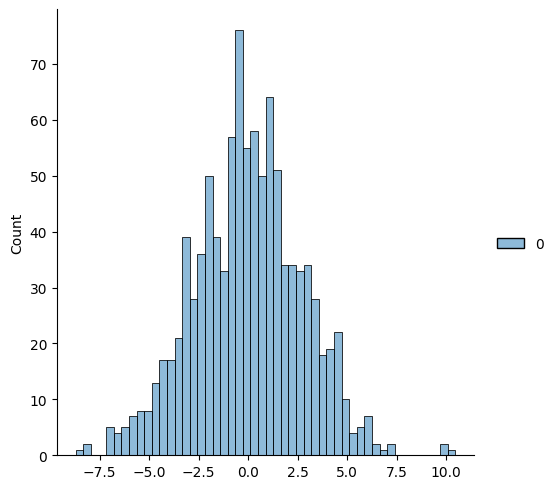

In [163]:
sns.displot(e1, bins=50)